In [71]:
import re
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords

data=pd.read_csv("whiskey1.csv")
df=pd.DataFrame(data)

df['Score']=df['Score'].apply(lambda x:re.search(r'[0-9]+',x).group(0))
df

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol
0,Black Bowmore 42 year old 1964 vintage,What impresses me most is how this whisky evol...,97,Single Malt Scotch,John Hansell,4500.0,Summer 2008,40.50%
1,Bowmore 46 year old (distilled 1964),There have been some legendary Bowmores from t...,97,Single Malt Scotch,Dave Broom,13500.0,Fall 2012,42.90%
2,Gold Bowmore 1964 vintage,Deep gold color. Surprisingly lively on the no...,96,Single Malt Scotch,John Hansell,6250.0,Winter 2009,42.40%
3,Bowmore 40 year old,"Definitely showing its age, but not in a bad w...",96,Single Malt Scotch,John Hansell,11000.0,Summer 2011,44.80%
4,The Dalmore 50 year old,The Dalmore is one of a handful of whiskies th...,96,Single Malt Scotch,John Hansell,1500.0,Fall 2009,52.80%
5,Glenfarclas Family Casks 1954 (Cask #1260),A rich amber color and elegantly oxidized note...,96,Single Malt Scotch,Dave Broom,3360.0,Fall 2014,47.20%
6,The Glenlivet Cellar Collection 1969 vintage,Itâ€™s great that Glenlivet releases whiskies ...,96,Single Malt Scotch,John Hansell,750.0,Winter 2007,50.80%
7,The Macallan 29 year old 1976 Vintage (Cask #1...,Classic sherry cask-aged Macallan. Antique amb...,96,Single Malt Scotch,John Hansell,1500.0,Spring 2008,45.40%
8,Ardbeg 1974 Vintage (Cask #3145),"Cask #3145 is the lighter in color, and the sw...",95,Single Malt Scotch,John Hansell,20000.0,Spring 2008,49.90%
9,Ardbeg Corryvreckan,"Part of the permanent Ardbeg range since 2008,...",95,Single Malt Scotch,Gavin Smith,90.0,Fall 2018,57.10%


In [72]:
df['Score']=df['Score'].apply(lambda x: int(x))
rank=df.groupby(['Category']).mean().sort_values(by="Score", ascending=False)
rank=rank.round()
fig = go.Figure(data=[go.Table(
    header=dict(values=["Category","Score"],
                fill_color='peru',
                align='left'),
    cells=dict(values=[ rank.index, rank.Score],
               fill_color=[['burlywood','navajowhite']*10],
               align='left'))
])

fig.show()

In [73]:
df['Review']
# Fill na with empty string
df['Review'] = df['Review'].fillna('')
stop = stopwords.words('english')
# Convert all the string to lower cases
df['Review'] = df['Review'].str.lower()
# \S+ means anything that is not an empty space
df['Review'] = df['Review'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
df['Review'] = df['Review'].apply(lambda x: re.sub('\s+', ' ', x))
df['Review'] = df['Review'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
df['Review'] = df['Review'].apply(lambda x: re.sub('[^\w\s]', '', x))
df.Review.count()
df[df.Review.str.contains("nose")].count()
df[df.Review.str.contains("finish")].count()
df.Reviewer.nunique()
flavor=df.loc[df.Review.str.contains("nose"),['Review']]
flavor=flavor.assign(Palate=df.Review[df.Review.str.contains("palate")])
flavor=flavor.assign(Finish=df.Review[df.Review.str.contains("finish")])
flavor.to_csv('flavor.csv')
df['Review']


0       impresses whisky evolves incredibly complex no...
1       legendary bowmores mid60s every bit equal shar...
2       deep gold color surprisingly lively nose age c...
3       definitely showing age bad way â distillery ch...
4       dalmore one handful whiskies seem able age cas...
5       rich amber color elegantly oxidized notes gree...
6       itâs great glenlivet releases whiskies cellar ...
7       classic sherry caskaged macallan antique amber...
8       cask 3145 lighter color sweet notes balance sm...
9       part permanent ardbeg range since 2008 corryvr...
10      expression matured european oak oloroso sherry...
11      whisky sensational glorious mix ginseng syrup ...
12      astonishingly fresh clean 30 years oak incredi...
13      bottled 2004 recently put circulation us very ...
14      whisky positive aspects mature whisky depth co...
15      though brora acquired cult status said years s...
16      maturation 1978 distillate taken place europea...
17      quite 

In [74]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['Review']=df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df['Review']
for column in df.columns:
    try:
# Convert all the string to lower cases
        df[column] = df[column].str.lower()
# \S+ means anything that is not an empty space
        df[column] = df[column].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
        df[column] = df[column].apply(lambda x: re.sub('\s+', ' ', x))
        df[column] = df[column].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
        df[column] = df[column].apply(lambda x: re.sub('[^\w\s]', '', x))
        print(column+' is done')
    except:
        print(column+" is not string")


Whiskey is done
Review is done
Score is not string
Category is done
Reviewer is done
Price is not string
Date is done
Alcohol is not string


In [75]:
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()

df['Review']=df['Review'].apply(lambda x: ' '.join([lemztr.lemmatize(word) for word in x.split()]))
df['Review'] = df['Review'].apply(lambda x: re.sub('[0-9]{4}', ' ', x))
df['Review']

0       impress whiski evolv incred complex nose palat...
1       legendari bowmor mid60 everi bit equal share r...
2       deep gold color surprisingli live nose age com...
3       definit show age bad way â distilleri charact ...
4       dalmor one hand whiski seem abl age cask mani ...
5       rich amber color elegantli oxid note greet lus...
6       itâ great glenlivet releas whiski cellar colle...
7       classic sherri caskag macallan antiqu amber hi...
8       cask   lighter color sweet note balanc smoke s...
9       part perman ardbeg rang sinc   corryvreckan cr...
10      express matur european oak oloroso sherri butt...
11      whiski sensat gloriou mix ginseng syrup bake b...
12      astonishingli fresh clean 30 year oak incred d...
13      bottl   recent put circul u veri strang itâ wo...
14      whiski posit aspect matur whiski depth complex...
15      though brora acquir cult statu said year speci...
16      matur   distil taken place european oak refil ...
17      quit s

In [76]:
from nltk.tokenize import word_tokenize 
df['Review'] = df['Review'].apply(lambda x: word_tokenize(x))
df['Review']

0       [impress, whiski, evolv, incred, complex, nose...
1       [legendari, bowmor, mid60, everi, bit, equal, ...
2       [deep, gold, color, surprisingli, live, nose, ...
3       [definit, show, age, bad, way, â, distilleri, ...
4       [dalmor, one, hand, whiski, seem, abl, age, ca...
5       [rich, amber, color, elegantli, oxid, note, gr...
6       [itâ, great, glenlivet, releas, whiski, cellar...
7       [classic, sherri, caskag, macallan, antiqu, am...
8       [cask, lighter, color, sweet, note, balanc, sm...
9       [part, perman, ardbeg, rang, sinc, corryvrecka...
10      [express, matur, european, oak, oloroso, sherr...
11      [whiski, sensat, gloriou, mix, ginseng, syrup,...
12      [astonishingli, fresh, clean, 30, year, oak, i...
13      [bottl, recent, put, circul, u, veri, strang, ...
14      [whiski, posit, aspect, matur, whiski, depth, ...
15      [though, brora, acquir, cult, statu, said, yea...
16      [matur, distil, taken, place, european, oak, r...
17      [quit,

In [77]:
df

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol
0,black bowmore 42 year old 1964 vintage,"[impress, whiski, evolv, incred, complex, nose...",97,single malt scotch,john hansell,4500.0,summer 2008,40.50%
1,bowmore 46 year old distilled 1964,"[legendari, bowmor, mid60, everi, bit, equal, ...",97,single malt scotch,dave broom,13500.0,fall 2012,42.90%
2,gold bowmore 1964 vintage,"[deep, gold, color, surprisingli, live, nose, ...",96,single malt scotch,john hansell,6250.0,winter 2009,42.40%
3,bowmore 40 year old,"[definit, show, age, bad, way, â, distilleri, ...",96,single malt scotch,john hansell,11000.0,summer 2011,44.80%
4,dalmore 50 year old,"[dalmor, one, hand, whiski, seem, abl, age, ca...",96,single malt scotch,john hansell,1500.0,fall 2009,52.80%
5,glenfarclas family casks 1954 cask 1260,"[rich, amber, color, elegantli, oxid, note, gr...",96,single malt scotch,dave broom,3360.0,fall 2014,47.20%
6,glenlivet cellar collection 1969 vintage,"[itâ, great, glenlivet, releas, whiski, cellar...",96,single malt scotch,john hansell,750.0,winter 2007,50.80%
7,macallan 29 year old 1976 vintage cask 11354,"[classic, sherri, caskag, macallan, antiqu, am...",96,single malt scotch,john hansell,1500.0,spring 2008,45.40%
8,ardbeg 1974 vintage cask 3145,"[cask, lighter, color, sweet, note, balanc, sm...",95,single malt scotch,john hansell,20000.0,spring 2008,49.90%
9,ardbeg corryvreckan,"[part, perman, ardbeg, rang, sinc, corryvrecka...",95,single malt scotch,gavin smith,90.0,fall 2018,57.10%


In [78]:
from scipy import stats
group=df.groupby(['Category'])
A=df.groupby(['Category'])['Score'].shift(-1)
A=A.dropna()
group['Score'].apply(lambda x: stats.ttest_ind(x,A))


Category
blended malt scotch whisky       (2.379708711766155, 0.017373747130694436)
blended scotch whisky            (1.3377403003139108, 0.18105681878552948)
bourbontennessee                (5.106642557200167, 3.417398973186593e-07)
canadian                       (-3.6198993722205275, 0.000298351142252484)
grain scotch whisky             (-0.9013222314737411, 0.36747430331605735)
irish                             (1.543057213006129, 0.12289863493839812)
japanese                         (1.7970204063981778, 0.07241048318164683)
new zealand                   (-3.4106743347611985, 0.0006548328198131534)
rye whiskey                      (1.8914754410074726, 0.05863416574791947)
single malt scotch             (-2.8847622632903733, 0.003931633168918085)
unspecified single malt           (-2.3455660013417, 0.019049803683226556)
Name: Score, dtype: object

In [79]:
B=df.groupby(['Category'])['Score'].shift(-2)
B=B.dropna()
group['Score'].apply(lambda x: stats.ttest_ind(x,B))

Category
blended malt scotch whisky         (2.450406305879117, 0.01431290834293367)
blended scotch whisky              (1.4181146346602616, 0.1562350618397683)
bourbontennessee                (5.233577974782297, 1.7399033376616465e-07)
canadian                      (-3.5566055567846817, 0.00038002410864703507)
grain scotch whisky              (-0.8786927178850198, 0.37962378830970733)
irish                              (1.598984092584209, 0.10990598068276355)
japanese                          (1.8517159993354129, 0.06414310907045233)
new zealand                      (-3.406383989072569, 0.000665199305334056)
rye whiskey                      (1.9614588955658303, 0.049896013330167244)
single malt scotch              (-2.7092630497355064, 0.006763277816763208)
unspecified single malt         (-2.3408371840807387, 0.019292588695640697)
Name: Score, dtype: object

In [80]:
stats.ttest_ind(df[df['Category']==' Bourbon/Tenessee ']['Score'],df[df['Category']==' Rye Whiskey ']['Score'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [81]:
df.loc[1745]

Whiskey                                        ben nevis 1998
Review      [initi, mulch, damp, undergrowth, nose, whiff,...
Score                                                      82
Category                                   single malt scotch
Reviewer                                          gavin smith
Price                                                      90
Date                                              summer 2011
Alcohol                                                   46%
Name: 1745, dtype: object

In [82]:
pd.DataFrame(df[df['Category']=='Rye Whiskey']['Score'])

,Score


In [83]:
#df=df.drop(df['Unnamed: 8'])
df.columns

Index(['Whiskey', 'Review', 'Score', 'Category', 'Reviewer', 'Price', 'Date',
       'Alcohol'],
      dtype='object')

In [84]:
A=df[['Price','Score']]

In [85]:
correlation=A.corr(method='pearson')

In [86]:

def finder(x):
    try:
        return re.search(r'[0-9][0-9] year old', x).group(0)
    except:
        try:
            return re.search(r'[0-9] year old', x).group(0)
        except:
            return str(0)
        
df=df.assign(Age=df['Whiskey'].apply(lambda x: finder(x)))    


In [87]:
df['Age'] = df.Age.apply(lambda x: re.sub('[^0-9.]', '',x))

In [88]:
df['Age']=df.Age.apply(lambda x: int(x))
df['Price']

0        4500.0
1       13500.0
2        6250.0
3       11000.0
4        1500.0
5        3360.0
6         750.0
7        1500.0
8       20000.0
9          90.0
10      15000.0
11      26650.0
12        400.0
13        200.0
14        400.0
15        455.0
16        750.0
17        200.0
18        460.0
19       2525.0
20       1250.0
21        280.0
22      15000.0
23        500.0
24        215.0
25        300.0
26        400.0
27        181.0
28      20000.0
29         80.0
         ...   
3744      196.0
3745       52.0
3746       85.0
3747      112.0
3748       75.0
3749       44.0
3750      152.0
3751      245.0
3752       55.0
3753      100.0
3754       65.0
3755      145.0
3756      235.0
3757       33.0
3758      161.0
3759      100.0
3760      162.0
3761       88.0
3762      125.0
3763       44.0
3764      144.0
3765      140.0
3766      112.0
3767       70.0
3768       94.0
3769       85.0
3770       45.0
3771      152.0
3772      146.0
3773      138.0
Name: Price, Length: 377

In [89]:
#df['Price'] = df.Price.apply(lambda x: re.sub('[^0-9.]', '',x))
df['Price'] = df.Price.apply(lambda x: float(x))

ValueError: operands could not be broadcast together with shapes (1359,) (3774,) 

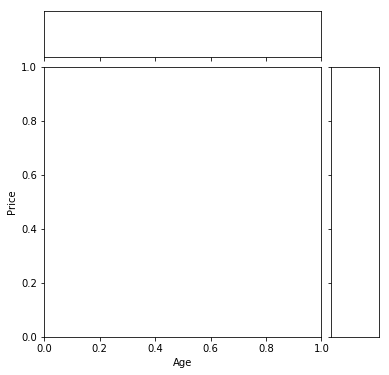

In [90]:
import seaborn as sns
#df.Price=df.Price.loc[(df.Price-df.Price.mean()).abs()/df.Price.std()<3]
plot=sns.jointplot(df[df.Age>0].Age, df['Price'], alpha=0.2)
#plot.ax_marg_x.set_xlim(0, 20)
#plot.ax_marg_y.set_ylim(0, 1000)


In [91]:
df[df['Price']>10000]['Price']

1        13500.0
3        11000.0
8        20000.0
10       15000.0
11       26650.0
22       15000.0
28       20000.0
32       27747.0
35       30000.0
37       11824.0
70       15000.0
86       60000.0
87       12500.0
140      15000.0
171      12000.0
175      16000.0
275      24000.0
327      23427.0
365      27620.0
366      12000.0
434      21000.0
511      25000.0
581      17600.0
931      15000.0
982      14999.0
1106     15000.0
1142     15000.0
1987     12000.0
2195    157000.0
Name: Price, dtype: float64

In [111]:
df.Reviewer.apply(lambda x: x.strip())
reviewers=df.groupby(['Reviewer']).mean().sort_values(by='Score', ascending=False)

In [115]:
df.Reviewer.value_counts()


john hansell              1119
gavin smith                822
dave broom                 493
jonny mccormick            441
davin de kergommeaux       218
fred minnick               164
susannah skiver barton     124
dominic roskrow            115
lew bryson                  95
jeffery lindenmuth          84
david fleming               56
geoffrey kleinman           37
adam polonski                6
Name: Reviewer, dtype: int64

In [102]:
df.loc[df['Reviewer']=='adam polonski'].count()

Whiskey     6
Review      6
Score       6
Category    6
Reviewer    6
Price       6
Date        6
Alcohol     6
Age         6
dtype: int64

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol,Age


In [105]:
df[df.Score > 96]

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol,Age
0,black bowmore 42 year old 1964 vintage,"[impress, whiski, evolv, incred, complex, nose...",97,single malt scotch,john hansell,4500.0,summer 2008,40.50%,42
1,bowmore 46 year old distilled 1964,"[legendari, bowmor, mid60, everi, bit, equal, ...",97,single malt scotch,dave broom,13500.0,fall 2012,42.90%,46
2175,johnnie walker blue label,"[magnific, power, intens, caramel, dri, peat, ...",97,blended scotch whisky,jonny mccormick,225.0,spring 2018,40%,0
2640,four roses limited edition small batch 2013 re...,"[marriag, 13, 18, year, old, bourbon, matur, y...",97,bourbontennessee,john hansell,85.0,winter 2013,51.50%,0
2641,parkers heritage collection,"[bottl, celebr, master, distil, parker, beam, ...",97,bourbontennessee,john hansell,150.0,fall 2009,50%,0


In [106]:
import collections as coll
words=coll.Counter()
for review in df['Review']:
    [words.update([word]) for word in review]
words

Counter({'impress': 97,
         'whiski': 1652,
         'evolv': 60,
         'incred': 45,
         'complex': 509,
         'nose': 1669,
         'palat': 1896,
         'thick': 191,
         'viscou': 68,
         'note': 2069,
         'sticki': 36,
         'toffe': 838,
         'earthi': 243,
         'oak': 1911,
         'fig': 162,
         'cake': 141,
         'roast': 215,
         'nut': 301,
         'fallen': 9,
         'fruit': 2141,
         'pancak': 19,
         'batter': 16,
         'black': 460,
         'cherri': 350,
         'ripe': 369,
         'peach': 376,
         'dark': 570,
         'chocolatecov': 38,
         'espresso': 45,
         'bean': 45,
         'polish': 282,
         'leather': 428,
         'tobacco': 273,
         'hint': 876,
         'wild': 40,
         'game': 9,
         'linger': 268,
         'leafi': 22,
         'damp': 106,
         'kiln': 31,
         'smoke': 1026,
         'flavor': 802,
         'continu': 92,
       

In [107]:

words.pop('â')
words.pop('whiski')
words.pop('itâ')
words.pop('one')
words.pop('offer')
words.pop('quit')
words.pop('like')
words.pop('first')
words.pop('bottl')
words.pop('cask')
words.pop('bourbon')
words.pop('barrel')
words.pop('thereâ')
words.pop('nice')
words.pop('show')
words.pop('make')
words.pop('along')
words.pop('good')
words.pop('time')
words.pop('u')
words.pop('becom')
words.pop('still')
words.pop('12')
words.pop('two')
words.pop('get')
words.pop('rather')
words.pop('rang')
words.pop('give')
words.pop('use')
words.pop('though')
words.pop('live')
words.pop('le')
words.pop('date')
words.pop('back')
words.pop('avail')

words.pop('refil')
words.pop('would')
words.pop('ad')
words.pop('firstfil')
words.pop('way')
words.pop('think')
words.pop('islay')
words.pop('take')

words.pop('distilleri')
words.pop('distil')
words.pop('initi')
words.pop('tast')
words.pop('add')
words.pop('american')
words.pop('influenc')
words.pop('bring')

words.most_common()[0:199]

[('finish', 2807),
 ('fruit', 2141),
 ('note', 2069),
 ('sweet', 1962),
 ('oak', 1911),
 ('palat', 1896),
 ('spice', 1813),
 ('nose', 1669),
 ('vanilla', 1618),
 ('dri', 1391),
 ('year', 1303),
 ('chocol', 1056),
 ('old', 1037),
 ('smoke', 1026),
 ('sherri', 1009),
 ('malt', 983),
 ('caramel', 958),
 ('honey', 918),
 ('hint', 876),
 ('orang', 859),
 ('toffe', 838),
 ('pepper', 806),
 ('matur', 804),
 ('flavor', 802),
 ('cinnamon', 767),
 ('spici', 749),
 ('peat', 741),
 ('age', 682),
 ('balanc', 680),
 ('appl', 628),
 ('soft', 607),
 ('long', 599),
 ('whiskey', 597),
 ('releas', 595),
 ('light', 586),
 ('ginger', 578),
 ('rich', 577),
 ('citru', 574),
 ('dark', 570),
 ('water', 528),
 ('complex', 509),
 ('fresh', 496),
 ('aroma', 479),
 ('rye', 472),
 ('wood', 466),
 ('black', 460),
 ('fruiti', 448),
 ('express', 431),
 ('creami', 431),
 ('leather', 428),
 ('lemon', 427),
 ('candi', 415),
 ('slightli', 379),
 ('blend', 377),
 ('peach', 376),
 ('singl', 370),
 ('ripe', 369),
 ('new', 36

In [110]:
def findr(x):
    try:
        return re.search(r'[0-9]+',x).group(0)
    except:
        pass
    
df['Date']=df['Date'].apply(lambda x:findr(x))
df['Date']=df['Date'].apply(lambda x:int(x))
df.Date

0       2008
1       2012
2       2009
3       2011
4       2009
5       2014
6       2007
7       2008
8       2008
9       2018
10      2018
11      2014
12      2008
13      2009
14      2010
15      2011
16      2014
17      2004
18      2010
19      2011
20      2010
21      2007
22      2018
23      2009
24      2009
25      2007
26      2009
27      2011
28      2008
29      2018
        ... 
3744    2013
3745    2016
3746    2012
3747    2012
3748    2017
3749    2014
3750    2013
3751    2014
3752    2017
3753    2017
3754    2018
3755    2015
3756    2014
3757    2013
3758    2015
3759    2016
3760    2013
3761    2013
3762    2013
3763    2016
3764    2012
3765    2013
3766    2012
3767    2013
3768    2013
3769    2010
3770    2016
3771    2013
3772    2013
3773    2016
Name: Date, Length: 3774, dtype: int64

In [111]:
words.most_common()[185]
#'fruiti' 'cream' 'oili' 'tea' 'domin'
df

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol,Age
0,black bowmore 42 year old 1964 vintage,"[impress, whiski, evolv, incred, complex, nose...",97,single malt scotch,john hansell,4500.0,2008,40.50%,42
1,bowmore 46 year old distilled 1964,"[legendari, bowmor, mid60, everi, bit, equal, ...",97,single malt scotch,dave broom,13500.0,2012,42.90%,46
2,gold bowmore 1964 vintage,"[deep, gold, color, surprisingli, live, nose, ...",96,single malt scotch,john hansell,6250.0,2009,42.40%,0
3,bowmore 40 year old,"[definit, show, age, bad, way, â, distilleri, ...",96,single malt scotch,john hansell,11000.0,2011,44.80%,40
4,dalmore 50 year old,"[dalmor, one, hand, whiski, seem, abl, age, ca...",96,single malt scotch,john hansell,1500.0,2009,52.80%,50
5,glenfarclas family casks 1954 cask 1260,"[rich, amber, color, elegantli, oxid, note, gr...",96,single malt scotch,dave broom,3360.0,2014,47.20%,0
6,glenlivet cellar collection 1969 vintage,"[itâ, great, glenlivet, releas, whiski, cellar...",96,single malt scotch,john hansell,750.0,2007,50.80%,0
7,macallan 29 year old 1976 vintage cask 11354,"[classic, sherri, caskag, macallan, antiqu, am...",96,single malt scotch,john hansell,1500.0,2008,45.40%,29
8,ardbeg 1974 vintage cask 3145,"[cask, lighter, color, sweet, note, balanc, sm...",95,single malt scotch,john hansell,20000.0,2008,49.90%,0
9,ardbeg corryvreckan,"[part, perman, ardbeg, rang, sinc, corryvrecka...",95,single malt scotch,gavin smith,90.0,2018,57.10%,0


In [112]:
'''
dict1=coll.Counter()
for word in words.most_common()[185:199]:
    dict1.clear()
    word=word[0]
    for i in df.index:
        if word in df.loc[i]['Review']: 
            dict1[i]=1
        else:
            dict1[i]=0
#kwarg=str(word+'=dict1.values()')
#print(kwarg)
#dict1.values()
    df=df.assign(word=dict1.values()) 
    df=df.rename(columns={'word':word})
    '''
df5=pd.read_csv('processeddata.csv')
#df5=df5.drop(columns=['Unnamed: 0'])
#df5['Price']=df['Price']
df.max()

Whiskey                âœdouble maltâ speyside second edition
Review      [âœwheatedâ, bourbon, mean, doesnât, spici, ry...
Score                                                      97
Category                              unspecified single malt
Reviewer                               susannah skiver barton
Price                                                  157000
Date                                                     2019
Age                                                        70
dtype: object

In [137]:
'''
word='fruiti'
dict1=coll.Counter()
for i in df.index:
    if word in df.loc[i]['Review']: 
        dict1[i]=1
    else:
        dict1[i]=0
df.loc[:,word] = dict1.values()
#df=df.rename(columns={'word':word})
dict1.clear()
'''

In [116]:
#df5.to_csv('processeddata.csv')
df5.columns

Index(['Unnamed: 0', 'Score', 'Category', 'Reviewer', 'Price', 'Date',
       'Alcohol', 'Age', 'finish', 'fruit',
       ...
       'mola', 'young', 'beauti', 'last', 'mouthfeel', 'sooth', 'lime',
       'hogshead', 'melon', 'seawe'],
      dtype='object', length=184)

In [117]:
#df_numbers=df5.drop(columns=['Whiskey','Review'])
df_numbers=df5.drop(columns=['Unnamed: 0'])

In [189]:
clations=df_numbers.corr(method='pearson').abs()
relate=df_numbers.corr(method='pearson')

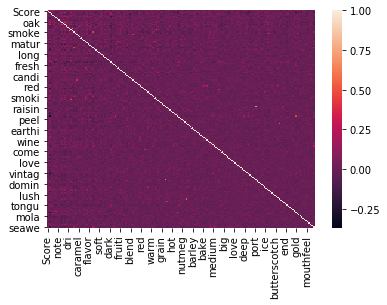

In [119]:
sns.heatmap(df_numbers.corr(method='pearson'))

In [190]:
lations=clations.unstack()
neglat=relate.unstack()
clat=lations.sort_values(ascending=False)
negclat=neglat.sort_values(ascending=True)
#list(filter(lambda x: x!=1, clat))
abs(negclat['Score'][1:50])

young         0.108692
domin         0.107667
littl         0.099059
hot           0.085959
spirit        0.079580
bitter        0.079339
water         0.065181
nose          0.064214
slightli      0.056705
background    0.056661
malti         0.053200
malt          0.052259
start         0.050608
barley        0.045110
grain         0.044381
tongu         0.044102
mouth         0.044040
lime          0.042569
emerg         0.039873
mix           0.038889
wine          0.038806
medium        0.037050
much          0.035168
dram          0.035139
singl         0.034511
fresh         0.029079
color         0.029011
lemon         0.022832
nutti         0.022317
bodi          0.018774
green         0.018749
palat         0.018558
charact       0.016766
exclus        0.016218
fruiti        0.016191
hogshead      0.015014
enjoy         0.014899
pear          0.014034
come          0.013712
express       0.011984
sweet         0.011899
corn          0.010681
also          0.006964
floral     

In [174]:
df_numbers=pd.read_csv('processeddata.csv')
#df_numbers=df_numbers.drop(columns=['Unnamed: 0'])

In [176]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
df_numbers.groupby('Category').mean()

,Score,Price,Date,Alcohol,Age,finish,fruit,note,sweet,oak,palat,spice,nose,vanilla,dri,year,chocol,old,smoke,sherri,malt,caramel,honey,hint,orang,toffe,pepper,matur,flavor,cinnamon,spici,peat,age,balanc,appl,soft,long,releas,light,ginger,rich,citru,dark,water,complex,fresh,aroma,wood,black,fruiti,express,creami,leather,lemon,candi,slightli,blend,peach,singl,ripe,new,subtl,cherri,red,floral,clean,nut,clove,sugar,mint,warm,licoric,smoki,white,milk,polish,almond,grain,mix,gentl,syrup,raisin,tobacco,coconut,hot,linger,textur,nutti,color,littl,peel,nutmeg,toast,bitter,cocoa,cream,green,corn,barley,earthi,develop,pineappl,smooth,pear,well,bake,berri,mouth,wine,follow,salt,oili,medium,brine,fudg,strength,roast,come,charact,big,great,delic,apricot,malti,also,pepperi,love,exclus,banana,full,tropic,emerg,tea,deep,fig,vintag,bodi,much,dram,bright,port,mapl,pie,coffe,domin,best,enjoy,ice,tannin,lengthi,oloroso,depth,fragrant,lush,butterscotch,cake,raspberri,powder,start,golden,eleg,end,tongu,open,differ,silki,spirit,orchard,gold,butt,background,mola,young,beauti,last,mouthfeel,sooth,lime,hogshead,melon,seawe
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
blended malt scotch whisky,88.029240,128.894737,2014.432749,46.292398,3.923977,0.538012,0.409357,0.350877,0.391813,0.163743,0.280702,0.461988,0.274854,0.321637,0.280702,0.169591,0.257310,0.111111,0.385965,0.111111,0.409357,0.204678,0.228070,0.070175,0.286550,0.169591,0.239766,0.040936,0.263158,0.093567,0.134503,0.315789,0.064327,0.105263,0.251462,0.093567,0.105263,0.058480,0.175439,0.146199,0.157895,0.187135,0.169591,0.111111,0.087719,0.163743,0.087719,0.076023,0.076023,0.128655,0.023392,0.134503,0.029240,0.187135,0.116959,0.035088,0.274854,0.116959,0.111111,0.076023,0.070175,0.046784,0.070175,0.052632,0.040936,0.040936,0.064327,0.111111,0.105263,0.046784,0.070175,0.040936,0.116959,0.029240,0.058480,0.040936,0.040936,0.040936,0.116959,0.064327,0.017544,0.052632,0.011696,0.040936,0.046784,0.052632,0.076023,0.017544,0.005848,0.087719,0.128655,0.052632,0.093567,0.058480,0.087719,0.099415,0.122807,0.005848,0.029240,0.052632,0.058480,0.046784,0.029240,0.064327,0.070175,0.081871,0.064327,0.087719,0.023392,0.029240,0.052632,0.040936,0.017544,0.058480,0.093567,0.081871,0.029240,0.040936,0.040936,0.116959,0.046784,0.017544,0.046784,0.111111,0.040936,0.058480,0.023392,0.023392,0.052632,0.035088,0.023392,0.029240,0.035088,0.035088,0.017544,0.005848,0.029240,0.052632,0.052632,0.029240,0.017544,0.000000,0.029240,0.023392,0.029240,0.076023,0.035088,0.035088,0.017544,0.011696,0.023392,0.035088,0.011696,0.005848,0.035088,0.029240,0.029240,0.000000,0.023392,0.035088,0.011696,0.023392,0.046784,0.017544,0.058480,0.011696,0.005848,0.029240,0.017544,0.011696,0.017544,0.011696,0.029240,0.017544,0.011696,0.058480,0.023392,0.087719,0.005848,0.070175,0.064327
blended scotch whisky,87.603113,858.311284,2014.961089,42.603113,7.556420,0.630350,0.416342,0.369650,0.408560,0.264591,0.229572,0.533074,0.354086,0.330739,0.338521,0.151751,0.252918,0.132296,0.303502,0.120623,0.268482,0.252918,0.284047,0.101167,0.338521,0.319066,0.186770,0.050584,0.284047,0.124514,0.097276,0.171206,0.124514,0.151751,0.221790,0.147860,0.066148,0.070039,0.190661,0.128405,0.182879,0.178988,0.151751,0.070039,0.062257,0.136187,0.178988,0.105058,0.132296,0.054475,0.046693,0.132296,0.073930,0.147860,0.073930,0.023346,0.466926,0.093385,0.031128,0.046693,0.081712,0.035019,0.077821,0.097276,0.097276,0.038911,0.073930,0.097276,0.105058,0.050584,0.081712,0.042802,0.062257,0.070039,0.027237,0.058366,0.081712,0.167315,0.089494,0.112840,0.046693,0.093385,0.058366,0.031128,0.031128,0.031128,0.081712,0.054475,0.042802,0.077821,0.202335,0.066148,0.081712,0.085603,0.066148,0.062257,0.070039,0.011673,0.073930,0.035019,0.050584,0.054475,0.159533,0.073930,0.058366,0.093385,0.038911,0.081712,0.019455,0.046693,0.058366,0.038

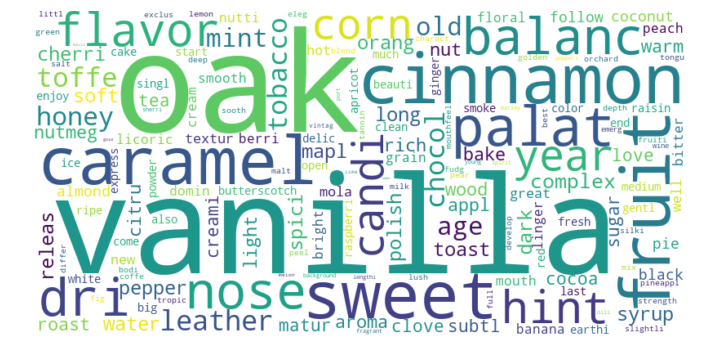

In [182]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
#wc.generate(' '.join(df['selftext']))
wc.generate_from_frequencies(df_numbers.drop(columns=['spice','note']).groupby('Category').mean().loc['bourbontennessee'][6:])
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

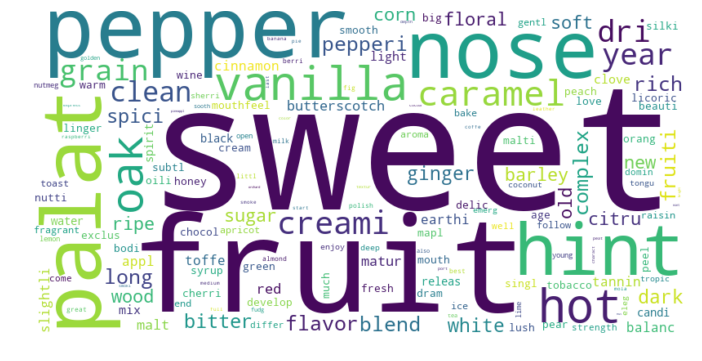

In [186]:
wc.generate_from_frequencies(df_numbers.drop(columns=['spice','note']).groupby('Category').mean().loc['canadian'][6:])
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

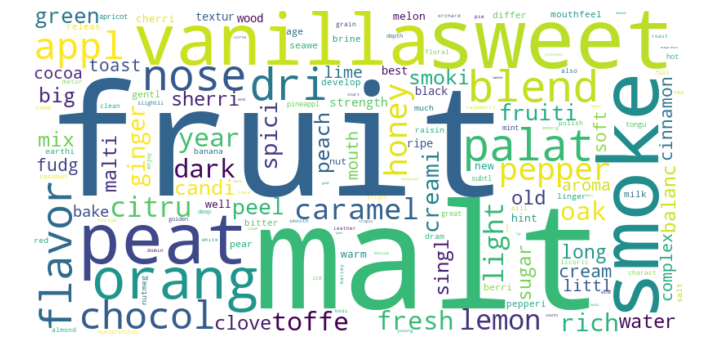

In [184]:
wc.generate_from_frequencies(df_numbers.drop(columns=['spice','note']).groupby('Category').mean().loc['blended malt scotch whisky'][6:])
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [129]:
scotch=df_numbers[df_numbers['Category']=='bourbontennessee']
#scotch.merge(df_numbers[df_numbers['Category']== 'blended malt scotch whisky'])

In [130]:
scotch

scotchstat=scotch.corr(method='pearson')
scotchnum=scotchstat.unstack()
scotchnum.sort_values()['Age']['Score']

0.15206729907264888

In [131]:
#df_numbers.to_csv('processeddata.csv')
df_numbers.groupby('Category').mean()

,Unnamed: 0,Score,Price,Date,Alcohol,Age,finish,fruit,note,sweet,oak,palat,spice,nose,vanilla,dri,year,chocol,old,smoke,sherri,malt,caramel,honey,hint,orang,toffe,pepper,matur,flavor,cinnamon,spici,peat,age,balanc,appl,soft,long,releas,light,ginger,rich,citru,dark,water,complex,fresh,aroma,wood,black,fruiti,express,creami,leather,lemon,candi,slightli,blend,peach,singl,ripe,new,subtl,cherri,red,floral,clean,nut,clove,sugar,mint,warm,licoric,smoki,white,milk,polish,almond,grain,mix,gentl,syrup,raisin,tobacco,coconut,hot,linger,textur,nutti,color,littl,peel,nutmeg,toast,bitter,cocoa,cream,green,corn,barley,earthi,develop,pineappl,smooth,pear,well,bake,berri,mouth,wine,follow,salt,oili,medium,brine,fudg,strength,roast,come,charact,big,great,delic,apricot,malti,also,pepperi,love,exclus,banana,full,tropic,emerg,tea,deep,fig,vintag,bodi,much,dram,bright,port,mapl,pie,coffe,domin,best,enjoy,ice,tannin,lengthi,oloroso,depth,fragrant,lush,butterscotch,cake,raspberri,powder,start,golden,eleg,end,tongu,open,differ,silki,spirit,orchard,gold,butt,background,mola,young,beauti,last,mouthfeel,sooth,lime,hogshead,melon,seawe
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
blended malt scotch whisky,2088.0,88.029240,128.894737,2014.432749,46.292398,3.923977,0.538012,0.409357,0.350877,0.391813,0.163743,0.280702,0.461988,0.274854,0.321637,0.280702,0.169591,0.257310,0.111111,0.385965,0.111111,0.409357,0.204678,0.228070,0.070175,0.286550,0.169591,0.239766,0.040936,0.263158,0.093567,0.134503,0.315789,0.064327,0.105263,0.251462,0.093567,0.105263,0.058480,0.175439,0.146199,0.157895,0.187135,0.169591,0.111111,0.087719,0.163743,0.087719,0.076023,0.076023,0.128655,0.023392,0.134503,0.029240,0.187135,0.116959,0.035088,0.274854,0.116959,0.111111,0.076023,0.070175,0.046784,0.070175,0.052632,0.040936,0.040936,0.064327,0.111111,0.105263,0.046784,0.070175,0.040936,0.116959,0.029240,0.058480,0.040936,0.040936,0.040936,0.116959,0.064327,0.017544,0.052632,0.011696,0.040936,0.046784,0.052632,0.076023,0.017544,0.005848,0.087719,0.128655,0.052632,0.093567,0.058480,0.087719,0.099415,0.122807,0.005848,0.029240,0.052632,0.058480,0.046784,0.029240,0.064327,0.070175,0.081871,0.064327,0.087719,0.023392,0.029240,0.052632,0.040936,0.017544,0.058480,0.093567,0.081871,0.029240,0.040936,0.040936,0.116959,0.046784,0.017544,0.046784,0.111111,0.040936,0.058480,0.023392,0.023392,0.052632,0.035088,0.023392,0.029240,0.035088,0.035088,0.017544,0.005848,0.029240,0.052632,0.052632,0.029240,0.017544,0.000000,0.029240,0.023392,0.029240,0.076023,0.035088,0.035088,0.017544,0.011696,0.023392,0.035088,0.011696,0.005848,0.035088,0.029240,0.029240,0.000000,0.023392,0.035088,0.011696,0.023392,0.046784,0.017544,0.058480,0.011696,0.005848,0.029240,0.017544,0.011696,0.017544,0.011696,0.029240,0.017544,0.011696,0.058480,0.023392,0.087719,0.005848,0.070175,0.064327
blended scotch whisky,2302.0,87.603113,858.311284,2014.961089,42.603113,7.556420,0.630350,0.416342,0.369650,0.408560,0.264591,0.229572,0.533074,0.354086,0.330739,0.338521,0.151751,0.252918,0.132296,0.303502,0.120623,0.268482,0.252918,0.284047,0.101167,0.338521,0.319066,0.186770,0.050584,0.284047,0.124514,0.097276,0.171206,0.124514,0.151751,0.221790,0.147860,0.066148,0.070039,0.190661,0.128405,0.182879,0.178988,0.151751,0.070039,0.062257,0.136187,0.178988,0.105058,0.132296,0.054475,0.046693,0.132296,0.073930,0.147860,0.073930,0.023346,0.466926,0.093385,0.031128,0.046693,0.081712,0.035019,0.077821,0.097276,0.097276,0.038911,0.073930,0.097276,0.105058,0.050584,0.081712,0.042802,0.062257,0.070039,0.027237,0.058366,0.081712,0.167315,0.089494,0.112840,0.046693,0.093385,0.058366,0.031128,0.031128,0.031128,0.081712,0.054475,0.042802,0.077821,0.202335,0.066148,0.081712,0.085603,0.066148,0.062257,0.070039,0.011673,0.073930,0.035019,0.050584,0.054475,0.159533,0.073930,0.058366,0.093385,0.038911,0.081712,0.0194

In [132]:
df_numbers.mean()['finish']

0.668698648290485

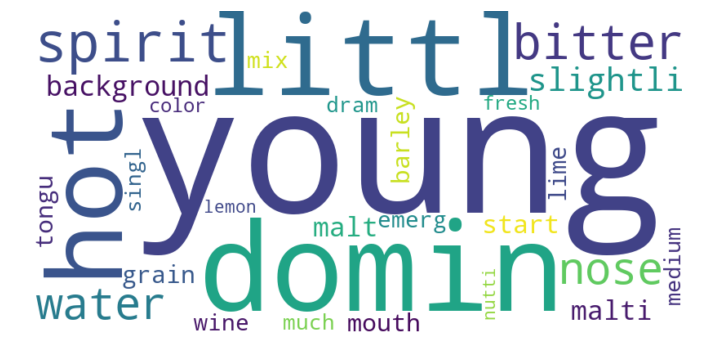

In [191]:
wc.generate_from_frequencies(abs(negclat['Score'][1:30]))
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
import re
import numpy as np
import pandas as pd
#import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords
import plotly.express as px
from sklearn import linear_model
df_numbers=pd.read_csv('processeddata.csv')
#df_numbers=df_numbers.drop(columns=['Unnamed: 0'])
df_numbers.loc[df_numbers['Category']=='single malt scotch','Category']='scotch'
df_numbers.loc[df_numbers['Category']=='blended malt scotch whisky','Category']='scotch'
df_numbers.loc[df_numbers['Category']=='blended scotch whisky','Category']='scotch'
df_numbers.loc[df_numbers['Category']=='grain scotch whisky', 'Category']='scotch'
ind=df_numbers.loc[df_numbers['Category'].isin(['unspecified single malt','new zealand'])].index

df_numbers.drop(ind, inplace=True)
#df_numbers=df_numbers.loc[(df.Price-df.Price.mean()).abs()/df.Price.std()<3]
df_numbers1=df_numbers.loc[(df.Price<1000)]
fig = px.scatter(df_numbers1,x="Age", y="Score", size="Price", 
	           color="Category",
                 hover_name="Reviewer", trendline="ols")

fig.update_layout(
    title=go.layout.Title(
        text="Whiskies Priced under $1,000",
        xref="paper",
        x=0)
    )
fig.show()


In [58]:
df_numbers

,Score,Category,Reviewer,Price,Date,Alcohol,Age,finish,fruit,note,...,mola,young,beauti,last,mouthfeel,sooth,lime,hogshead,melon,seawe
0,97,scotch,dave broom,4500.0,2012,42.0,46,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,96,scotch,john hansell,6250.0,2011,44.0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,96,scotch,dave broom,1500.0,2014,47.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,96,scotch,john hansell,3360.0,2007,50.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,96,scotch,john hansell,750.0,2008,45.0,29,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,95,scotch,john hansell,1500.0,2008,49.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,95,scotch,gavin smith,90.0,2018,46.0,43,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,95,scotch,john hansell,400.0,2009,50.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
13,95,scotch,john hansell,200.0,2010,53.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,95,scotch,dave broom,400.0,2011,54.0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
reg = linear_model.LinearRegression()
reg.fit(df_numbers['Score'].values.reshape(-1, 1), df_numbers['Age'].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
reg.coef_

array([[0.37486315]])

In [27]:
df_numbers.loc[df_numbers['Category']=='single malt scotch','Category']='scotch'
df_numbers.loc[df_numbers['Category']=='blended malt scotch whisky','Category']='scotch'
df_numbers.loc[df_numbers['Category']=='blended scotch whisky','Category']='scotch'
df_numbers

,Score,Category,Reviewer,Price,Date,Alcohol,Age,finish,fruit,note,...,mola,young,beauti,last,mouthfeel,sooth,lime,hogshead,melon,seawe
0,97,scotch,dave broom,4500.0,2012,42.0,46,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,96,scotch,john hansell,13500.0,2009,42.0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,96,scotch,john hansell,6250.0,2011,44.0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,96,scotch,john hansell,11000.0,2009,52.0,50,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,96,scotch,dave broom,1500.0,2014,47.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,96,scotch,john hansell,3360.0,2007,50.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,96,scotch,john hansell,750.0,2008,45.0,29,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,95,scotch,john hansell,1500.0,2008,49.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,95,scotch,gavin smith,20000.0,2018,57.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,95,scotch,gavin smith,90.0,2018,46.0,43,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
.index

SyntaxError: invalid syntax (<ipython-input-30-0665c01bd190>, line 1)

In [69]:
df_numbers.groupby('Reviewer').mean()



,Score,Price,Date,Alcohol,Age,finish,fruit,note,sweet,oak,...,mola,young,beauti,last,mouthfeel,sooth,lime,hogshead,melon,seawe
Reviewer,,,,,,,,,,,,,,,,,,,,,
adam polonski,88.166667,207.166667,2017.833333,49.333333,3.000000,0.666667,0.500000,0.166667,0.500000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000
dave broom,86.000000,358.519270,2013.385396,49.950920,9.965517,0.219067,0.440162,0.338742,0.454361,0.174442,...,0.020284,0.040568,0.014199,0.032454,0.002028,0.000000,0.022312,0.016227,0.022312,0.026369
david fleming,88.553571,68.517857,2019.000000,50.089286,2.375000,1.000000,0.160714,0.821429,0.339286,0.732143,...,0.053571,0.017857,0.017857,0.000000,0.053571,0.000000,0.107143,0.000000,0.089286,0.000000
davin de kergommeaux,86.651376,62.616972,2015.541284,45.279817,4.784404,0.477064,0.527523,0.394495,0.623853,0.316514,...,0.018349,0.022936,0.077982,0.022936,0.091743,0.018349,0.032110,0.004587,0.004587,0.000000
dominic roskrow,87.238095,148.561905,2012.028571,46.104762,3.685714,0.209524,0.333333,0.314286,0.352381,0.114286,...,0.000000,0.028571,0.057143,0.047619,0.009524,0.000000,0.038095,0.000000,0.047619,0.009524
fred minnick,87.384146,85.987805,2016.829268,50.902439,3.268293,0.823171,0.310976,0.384146,0.164634,0.323171,...,0.048780,0.018293,0.115854,0.024390,0.097561,0.000000,0.000000,0.000000,0.000000,0.000000
gavin smith,87.517032,694.645985,2015.549878,47.484185,9.046229,0.962287,0.496350,0.461071,0.412409,0.510949,...,0.002433,0.006083,0.002433,0.021898,0.018248,0.000000,0.017032,0.124088,0.023114,0.008516
geoffrey kleinman,87.621622,707.189189,2014.567568,51.648649,11.486486,0.864865,0.216216,0.270270,0.378378,0.540541,...,0.000000,0.000000,0.054054,0.027027,0.054054,0.000000,0.000000,0.027027,0.000000,0.000000
jeffery lindenmuth,90.119048,93.000000,2018.500000,50.690476,3.535714,0.666667,0.428571,0.440476,0.619048,0.583333,...,0.059524,0.023810,0.011905,0.000000,0.047619,0.000000,0.000000,0.000000,0.011905,0.000000


In [131]:
df.Reviewer.value_counts()[0:3:2]

 John Hansell     1119
 Dave Broom        493
Name: Reviewer, dtype: int64

In [106]:
import re
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords

data=pd.read_csv("whiskey1.csv")
df=pd.DataFrame(data)

df['Score']=df['Score'].apply(lambda x:re.search(r'[0-9]+',x).group(0))
df['Score']=df['Score'].apply(lambda x: int(x))
rank=df.groupby(['Category']).mean().sort_values(by="Score", ascending=False)
rank=rank.round()
fig = go.Figure(data=[go.Table(
    header=dict(values=["Reviewer","Reviews"],
                fill_color='darkturquoise',
                align='left'),
    cells=dict(values=[df.Reviewer.value_counts().index,df.Reviewer.value_counts().values],
               fill_color=[['powderblue','lightskyblue']*10],
               align='left'))
])

fig.show()
#df.Reviewer.value_counts()

In [73]:
df.loc[df['Category']=='Single Malt Scotch  ','Category']='Scotch'
df.loc[df['Category']=='Blended Malt Scotch Whisky  ','Category']='Scotch'
df.loc[df['Category']=='Blended Scotch Whisky  ','Category']='Scotch'
ind=df.loc[df['Category'].isin(['Unspecified Single Malt  ','New Zealand  ','Grain Scotch Whisky  '])].index

df.drop(ind, inplace=True)
rank=df.groupby(['Reviewer','Category'])
stackdata=rank.size().unstack(fill_value=0)

In [105]:
stackdata.loc[stackdata.index[1]]

Category
Bourbon/Tennessee        0
Canadian                 0
Irish                    0
Japanese                44
Rye Whiskey              0
Scotch                 449
Name:  Dave Broom , dtype: int64

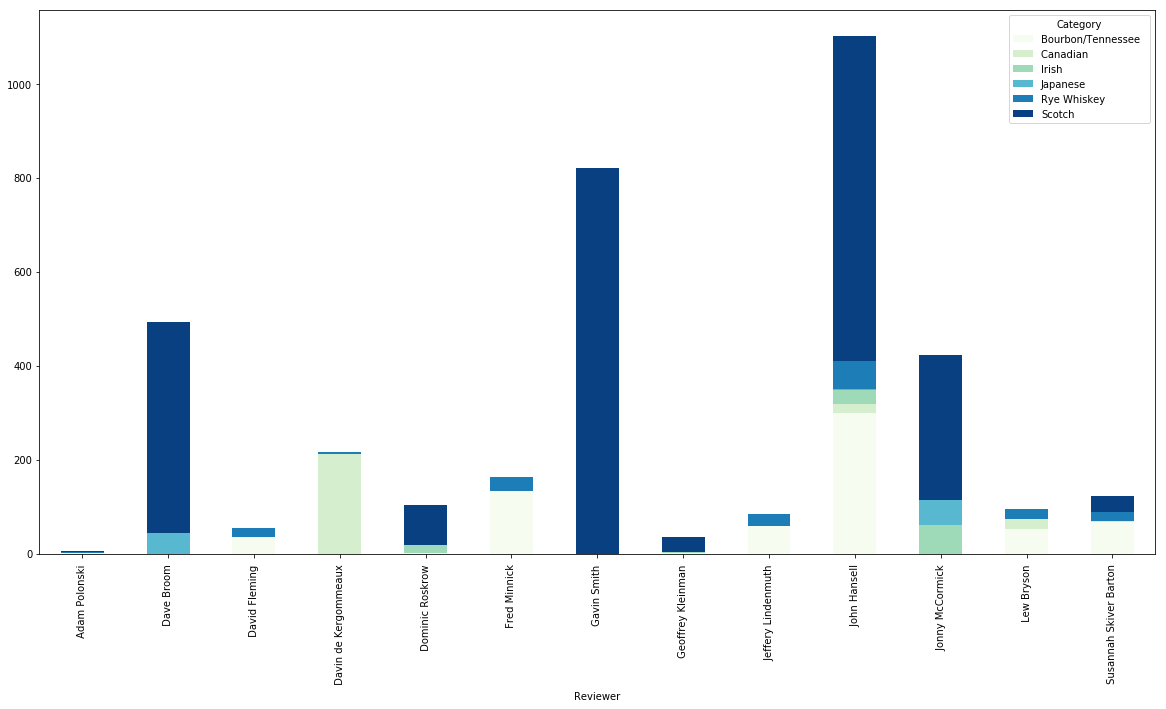

In [101]:
import matplotlib as plt
#stackdata.plot.bar(stacked=True)
colors = plt.cm.GnBu(np.linspace(0, 1, 6))
stackdata.plot(kind='bar', stacked=True, figsize=(20, 10), color=colors)

In [45]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
df_numbers=pd.read_csv('processeddata.csv')
#df_numbers=df_numbers.drop(columns=['Unnamed: 0'])
df_numbers.loc[df_numbers['Category']=='single malt scotch','Category']='scotch'
df_numbers.loc[df_numbers['Category']=='blended malt scotch whisky','Category']='scotch'
df_numbers.loc[df_numbers['Category']=='blended scotch whisky','Category']='scotch'
df_numbers.loc[df_numbers['Category']=='grain scotch whisky', 'Category']='scotch'
ind=df_numbers.loc[df_numbers['Category'].isin(['unspecified single malt','new zealand'])].index

df_numbers.drop(ind, inplace=True)
df_numbers=df_numbers.loc[df_numbers.Price<500]
df_numbers=df_numbers.loc[df_numbers.Age>0]
df_numbers.Price.mean()
df_numbers.Price.std()

89.5899708589915

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



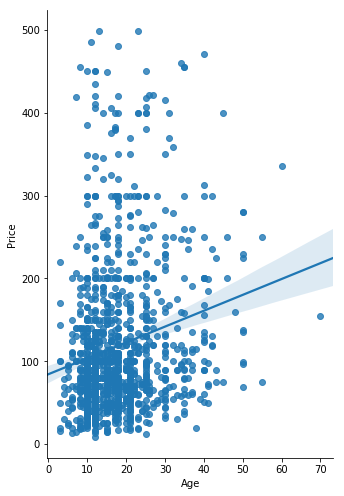

In [61]:
g=sns.pairplot(df_numbers, x_vars=['Age'], y_vars='Price', size=7, aspect=0.7,kind='reg')
#g.set(xlim=(0,80))
#g.set(ylim=(0,500))

In [47]:
lm1 = smf.ols(formula='Price ~ Age', data=df_numbers).fit()

# print the coefficients
lm1.params

Intercept    84.400101
Age           1.914421
dtype: float64

In [48]:
feature_cols = ['Age']
X = df_numbers[feature_cols]
y = df_numbers.Price

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

84.40010066953502
[1.91442129]


NameError: name 'plt' is not defined

In [49]:
lm1.conf_int()

,0,1
Intercept,73.401172,95.399029
Age,1.366849,2.461994


In [62]:
import plotly.express as px
from sklearn import linear_model
fig = px.scatter(df_numbers,x="Age", y="Score", size="Price", 
	           color="Category",
                 hover_name="Reviewer", trendline="ols")

fig.update_layout(
    title=go.layout.Title(
        text="Whiskeys Priced under $500",
        xref="paper",
        x=0)
    )
fig.show()


In [55]:
lmp = smf.ols(formula='Score ~ Age', data=df_numbers).fit()

# print the coefficients
lmp.params
feature_cols = ['Age']
X = df_numbers[feature_cols]
y = df_numbers.Score

# instantiate and fit
lmp2 = LinearRegression()
lmp2.fit(X, y)

# print the coefficients
print(lmp2.intercept_)
print(lmp2.coef_)

86.22056646001602
[0.07670327]


In [56]:
lmp.conf_int()

,0,1
Intercept,85.745542,86.695591
Age,0.053055,0.100352
